## DATA 606 - Capstone Project : Heart Disease Prediction Using Machine Learning
- Name : Sushanthik Reddy Poreddy
- ID: TY99095
- Professor: Chaojie Wang

In [1]:
# Import Required Libraries
import pandas as pd
import plotly.express as px
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

In [2]:
#setting the theme for the visualization
sns.set_theme(style="darkgrid")

In [3]:
# Loading the DataSet
heart_df = pd.read_csv("https://raw.githubusercontent.com/SushanthikPoreddy/sushanthik_data606/main/data/heart_statlog_cleveland_hungary_final.csv")
heart_df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
# looking for its columns
print("List of Features in the Dataset:")
for col in heart_df.columns:
  print(col)

List of Features in the Dataset:
age
sex
chest pain type
resting bp s
cholesterol
fasting blood sugar
resting ecg
max heart rate
exercise angina
oldpeak
ST slope
target


In [5]:
# Size of the DataSet
print("Number of Rows: ",heart_df.shape[0])
print("Number of Columns: ",heart_df.shape[1])

Number of Rows:  1190
Number of Columns:  12


In [6]:
# Description of DataSet
heart_df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [7]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


## Exploratory Data Analysis

#### 1. Average heart rate among Male and Female

In [8]:
heart_df_male = heart_df.query('sex == 1')
heart_df_male_avg = heart_df_male['max heart rate'].mean()

heart_df_female = heart_df.query('sex == 0')
heart_df_female_avg = heart_df_female['max heart rate'].mean()

data = {'Sex': ['Male', 'Female'], 'Average_Heart_Rate': [heart_df_male_avg, heart_df_female_avg]}
df_heartrate = pd.DataFrame(data)
df_heartrate

,Sex,Average_Heart_Rate
0,Male,137.154015
1,Female,148.074733


In [9]:
fig = px.pie(df_heartrate, values='Average_Heart_Rate', names='Sex', title='Average Heart Rate Among Male and Female')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#### 2. Visualization of the maximum heart rate recorded among the people affected with heart diseases and without heart diseases.

In [10]:
fig = px.bar(
    heart_df,
    x="target",
    y="max heart rate",
    color="target",
    title="Maximum Heart Rate among Persons with and without Heart Disease"
)
fig.update_xaxes(categoryorder="total descending")
fig.show()

#### 3. Percentage Share of Male and Female interms of Heart Disease

In [11]:
fig = px.pie(heart_df, values='target', names='sex', title='Heart Health Status Among Male and Female')
fig.update_traces(textposition='inside', textinfo='percent+label'),
fig.show()

#### 4. Level of Cholesterol among men and women

Text(0.5, 1.0, 'Average Cholesterol level among Male and Female')

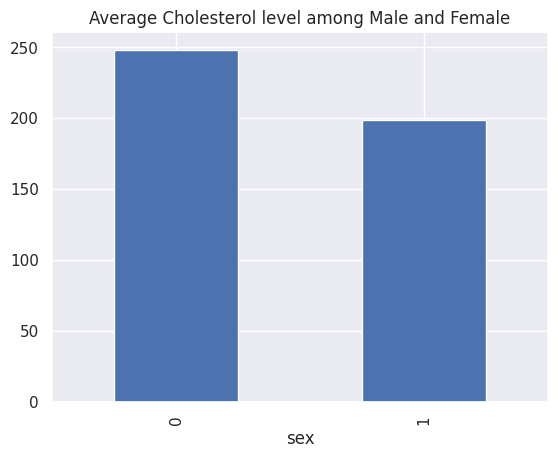

In [12]:
heart_df.groupby(['sex'])['cholesterol'].mean().plot(kind="bar").set_title("Average Cholesterol level among Male and Female")

#### 5. Comparision of Electrocardiography results of persons with and without Heart Disease of both the genders

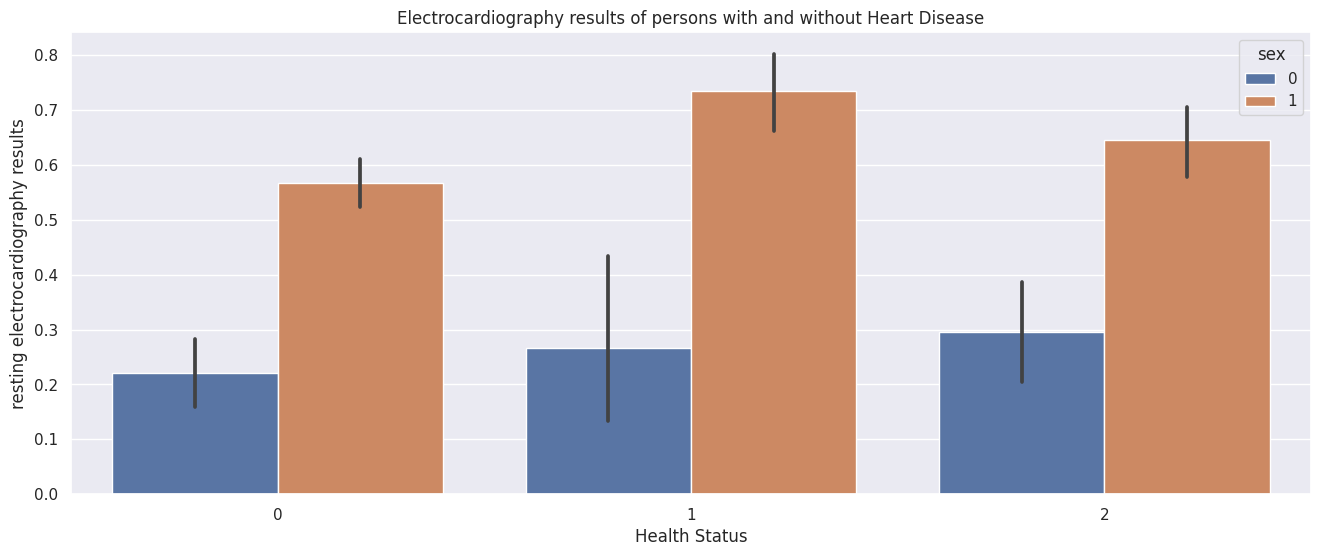

In [13]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x='resting ecg', y='target', hue='sex', data=heart_df).set(xlabel='Health Status',ylabel='resting electrocardiography results',title='Electrocardiography results of persons with and without Heart Disease')

#### 6. Number of people with different stages of Chest Pain among both the genders

Text(0.5, 1.0, 'Distrubution of different types of chest pain type')

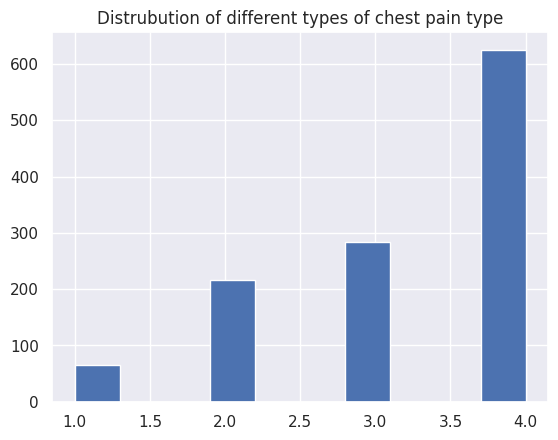

In [14]:
ax = heart_df['chest pain type'].hist()
ax.set_title("Distrubution of different types of chest pain type")

#### 7. Classification of persons blood pressue level based on health condition of heart 

Text(0.5, 1.0, 'Average Blood Pressure level among both the genders based on their health')

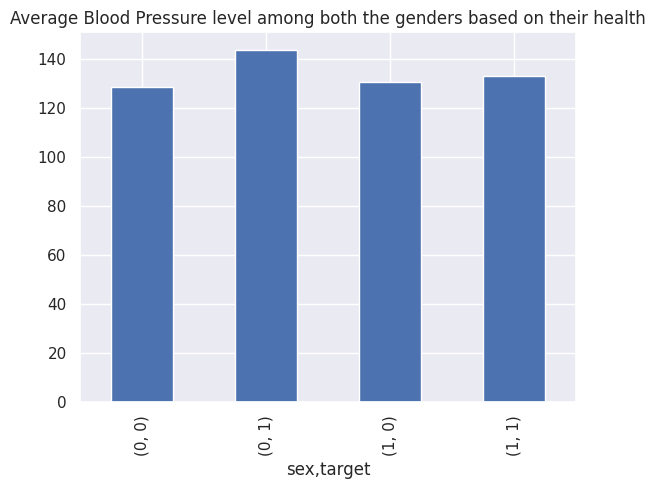

In [15]:
heart_df_visual = heart_df.groupby(['sex','target'])['resting bp s'].mean()
heart_df_visual.plot(kind="bar").set_title("Average Blood Pressure level among both the genders based on their health")

#### 8. Comparision of ST Slope among persons affected with heart disease and normal healthy people 

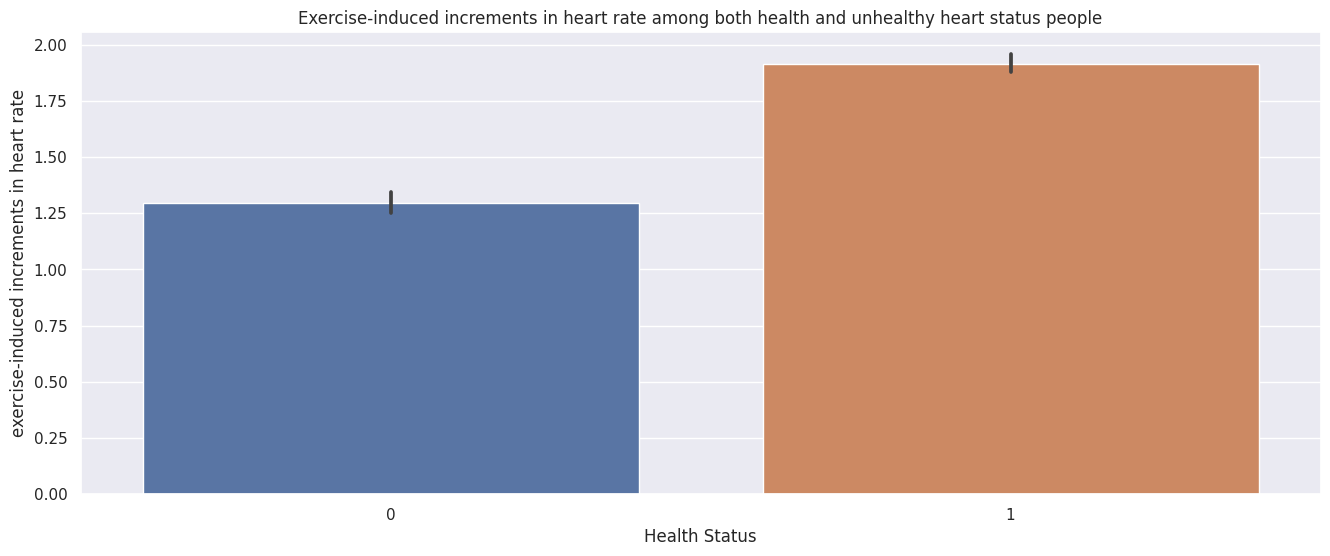

In [16]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(
    x='target', 
    y='ST slope', 
    data=heart_df).set(
        xlabel ="Health Status", 
        ylabel = "exercise-induced increments in heart rate",
        title='Exercise-induced increments in heart rate among both health and unhealthy heart status people'
        )

#### 9. Heart health status of different Age people

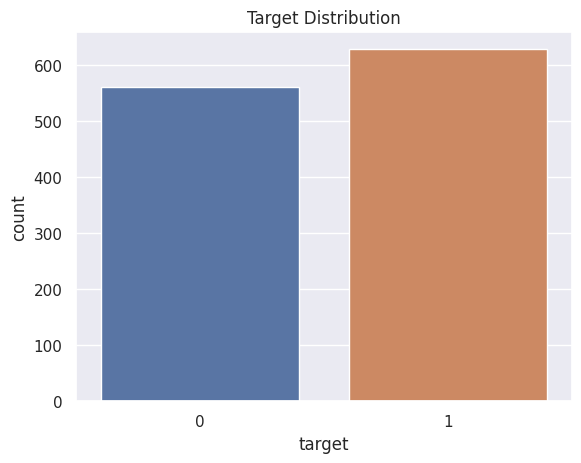

In [17]:
# Visualize the distribution of the target variable
sns.countplot(x='target', data=heart_df)
plt.title('Target Distribution')
plt.show()

#### 10. Correlation between the features

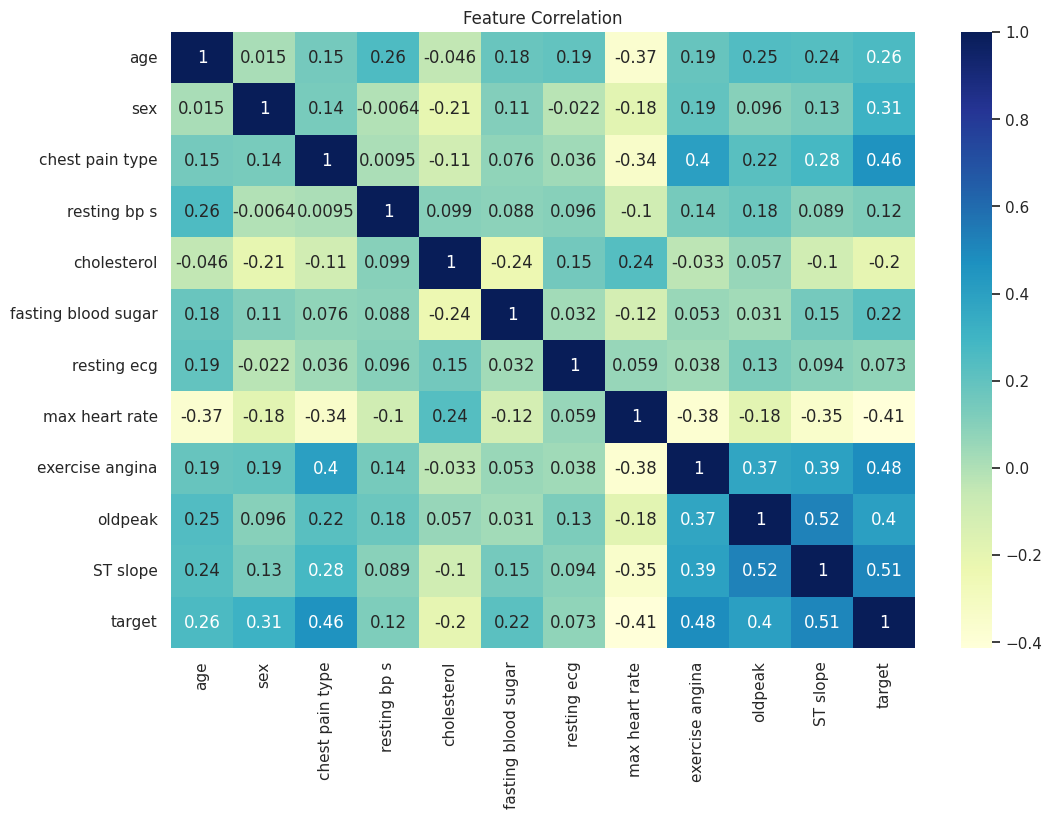

In [18]:
# Visualize the correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(heart_df.corr(), annot=True, cmap='YlGnBu')
plt.title('Feature Correlation')
plt.show()

### Data Cleaning
- Checking for Null Values

In [19]:
print("Does the dataset have any NULL values?:",heart_df.isnull().values.any())

Does the dataset have any NULL values?: False


In [20]:
null_values = heart_df.isna().sum()
null_values

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

<Axes: >

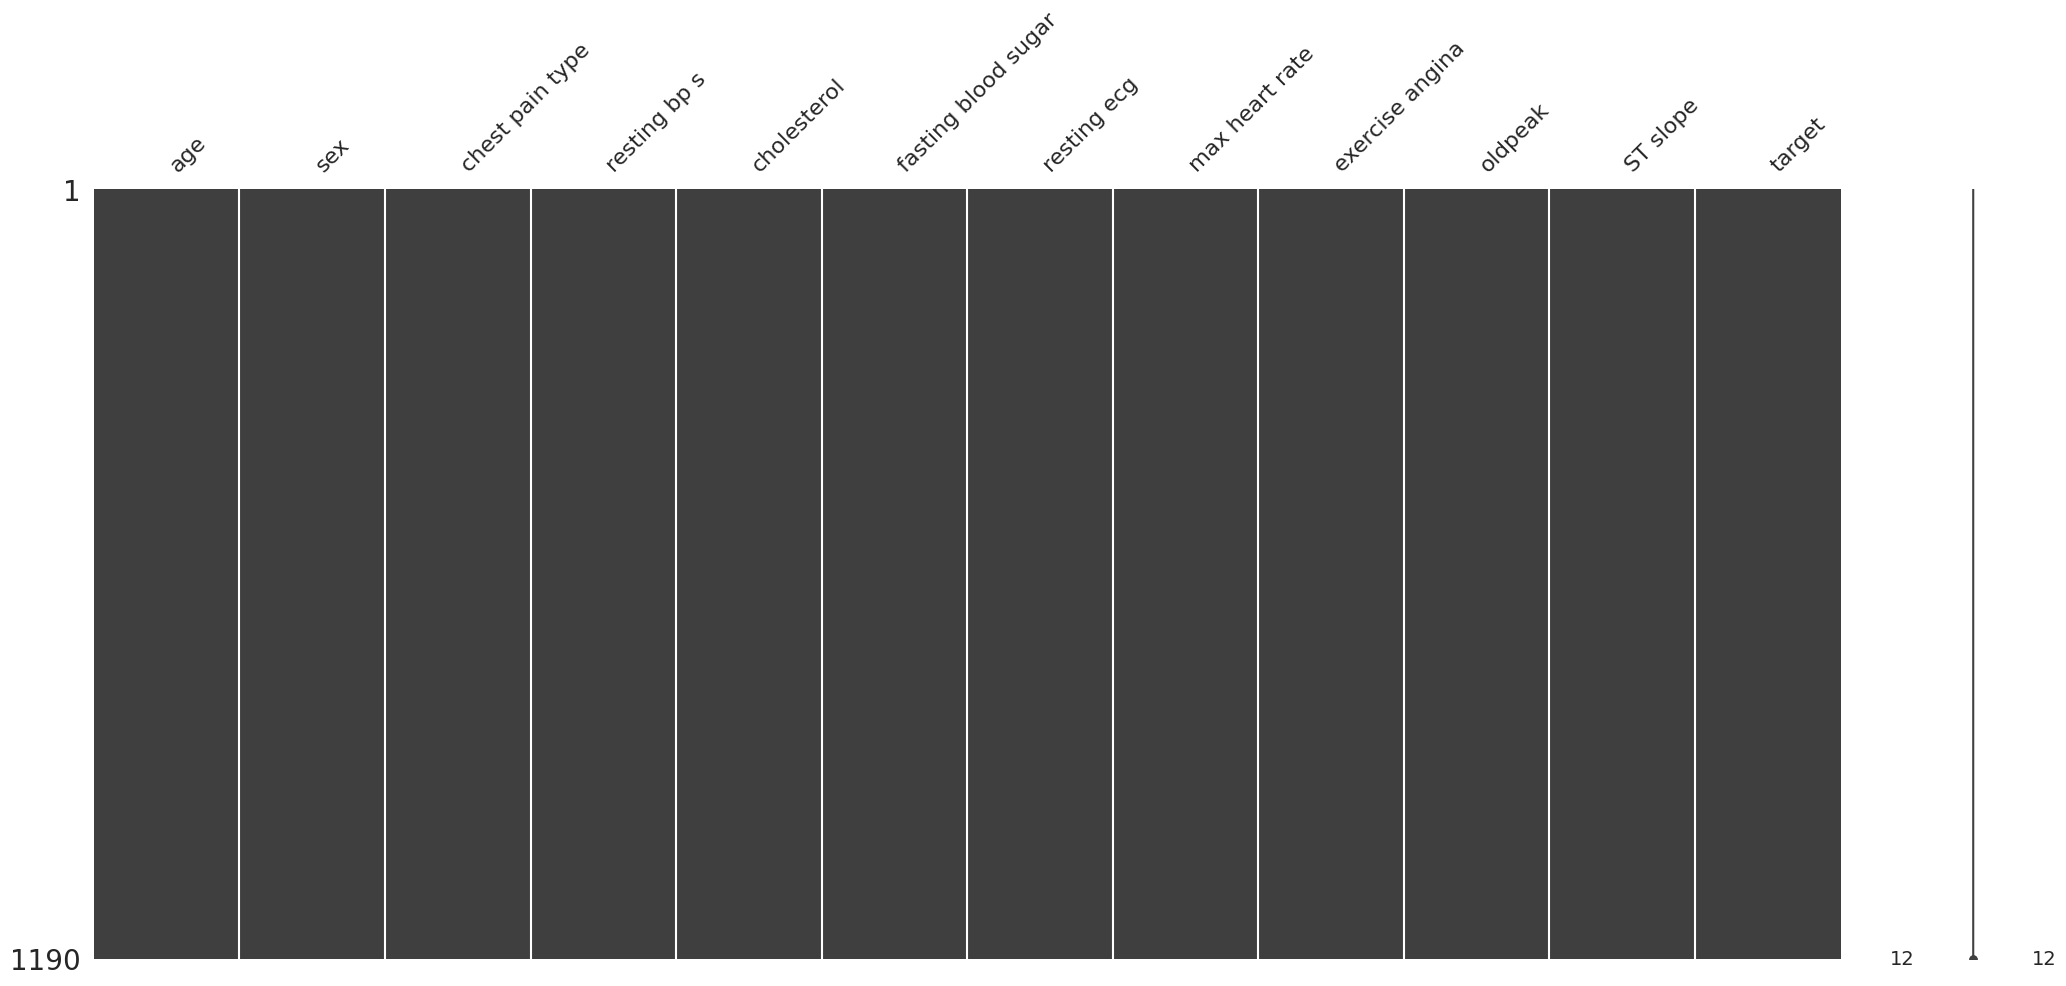

In [21]:
msno.matrix(heart_df)

### Splitting the dataset into training, test and validation data

In [22]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, precision_recall_curve, confusion_matrix

In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(heart_df.drop('target', axis=1), 
                                                    heart_df['target'], 
                                                    test_size=0.2, 
                                                    random_state=42)
print("Training DataSet Size:", (X_train.shape,y_train.shape),"\n""Test DataSet Size:", (X_test.shape,y_test.shape))

Training DataSet Size: ((952, 11), (952,)) 
Test DataSet Size: ((238, 11), (238,))


In [24]:
#scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classification Models

## Random Forest Classifier

In [25]:
print('\033[1m***Training RandomForest Classification Model:***\033[1m')

# Define a parameter grid to search over
params = {
    "class_weight": ['balanced', 'balanced_subsample'],
    "criterion": ['gini', 'entropy'],
    "max_features": ['auto', 'sqrt', 'log2'],
    "bootstrap" : [True, False]
}

# Create a RandomForestClassifier object with default hyperparameters
model_RFC = RandomForestClassifier(random_state=1)

# Create a StratifiedKFold object for cross-validation
cv_RFC = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a RandomizedSearchCV object to search over the parameter grid
model_RFC_random_search = RandomizedSearchCV(model_RFC, param_distributions=params, scoring='f1', cv=cv_RFC, n_jobs=-1, verbose=3)

# Fit the RandomizedSearchCV object to your training data
model_RFC_random_search.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("\033[1mBest parameters found by RandomizedSearchCV for Random Forest Classifier:\033[1m", model_RFC_random_search.best_params_)
# Print the best F1 score found by RandomizedSearchCV
print("\033[1mBest F1 score found by RandomizedSearchCV for Random Forest Classifier:\033[1m", model_RFC_random_search.best_score_)


***Training RandomForest Classification Model:***
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found by RandomizedSearchCV for Random Forest Classifier: {'max_features': 'log2', 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}
Best F1 score found by RandomizedSearchCV for Random Forest Classifier: 0.9091560076801881


In [26]:
# Use cross_validate to generate predictions on the training set
cv_results_RFC = cross_validate(model_RFC_random_search.best_estimator_, X_train, y_train, cv=5, scoring='f1', return_estimator=True, n_jobs=-1)

# Generate the classification report from the cross-validated results
y_train_pred = cv_results_RFC['estimator'][cv_results_RFC['test_score'].argmax()].predict(X_train)
print("Classification report generated from the results of RandomForestClassifier:")
print(classification_report(y_train, y_train_pred))

# Set the font scale of the seaborn plots
sns.set(font_scale=1)


Classification report generated from the results of RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       454
           1       0.98      0.99      0.99       498

    accuracy                           0.98       952
   macro avg       0.98      0.98      0.98       952
weighted avg       0.98      0.98      0.98       952



Text(0, 0.5, 'Recall')

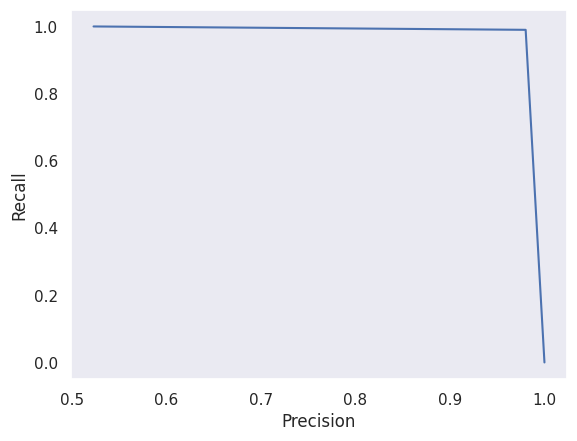

In [27]:
# Generate precision-recall curve based on predictions and true labels of training set
precision, recall, thresholds = precision_recall_curve(y_train, y_train_pred)

# Create a new figure and axis object for the plot
fig, ax = plt.subplots()

# Plot the precision-recall curve
ax.plot(precision, recall)

# Add a grid to the plot
ax.grid()

# Set the x-axis label to 'Precision (P)'
ax.set_xlabel('Precision')

# Set the y-axis label to 'Recall (R)'
ax.set_ylabel('Recall')


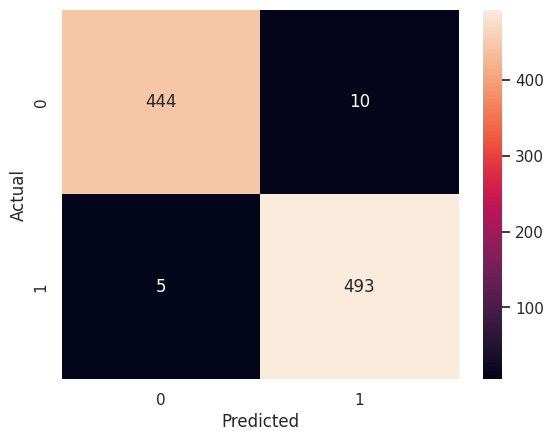

In [28]:
def show_classification_matrix(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, annot=True, fmt="0")
  ax = plt.gca()
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Actual")

show_classification_matrix(y_train, y_train_pred)

## Decision Tree Classifier

In [29]:
print('\033[1m***Training Decision Tree Classification Model:***\033[1m')

# Define a parameter grid to search over
params = {
    "splitter": ['best', 'random'],
    "criterion": ['gini', 'entropy'], 
    "max_features": ['auto', 'sqrt', 'log2'],
    "class_weight":["balanced"]
}

# Create a RandomForestClassifier object with default hyperparameters
model_DT = DecisionTreeClassifier(random_state=1)

# Create a StratifiedKFold object for cross-validation
cv_DT = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a RandomizedSearch object to search over the parameter grid
model_DT_random_search = RandomizedSearchCV(model_DT, param_distributions=params, scoring='f1', cv=cv_DT, n_jobs=-1, verbose=3)

# Fit the RandomizedSearchCV object to your training data
model_DT_random_search.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("\033[1mBest parameters found by RandomizedSearchCV for Decision Tree Classifier:\033[1m", model_DT_random_search.best_params_)
# Print the best F1 score found by RandomizedSearchCV
print("\033[1mBest F1 score found by RandomizedSearchCV for Decision Tree Classifier:\033[1m", model_DT_random_search.best_score_)


***Training Decision Tree Classification Model:***
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found by RandomizedSearchCV for Decision Tree Classifier: {'splitter': 'random', 'max_features': 'sqrt', 'criterion': 'gini', 'class_weight': 'balanced'}
Best F1 score found by RandomizedSearchCV for Decision Tree Classifier: 0.8670606127929993


In [30]:
# Use cross_validate to generate predictions on the training set
cv_results_DT = cross_validate(model_DT_random_search.best_estimator_, X_train, y_train, cv=5, scoring='f1', return_estimator=True, n_jobs=-1)

# Generate the classification report from the cross-validated results
y_train_pred = cv_results_DT['estimator'][cv_results_DT['test_score'].argmax()].predict(X_train)
print("Classification report generated from the results of DecisionTreeClassifier:")
print(classification_report(y_train, y_train_pred))

# Set the font scale of the seaborn plots
sns.set(font_scale=1)


Classification report generated from the results of DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       454
           1       0.98      0.97      0.98       498

    accuracy                           0.97       952
   macro avg       0.97      0.97      0.97       952
weighted avg       0.97      0.97      0.97       952



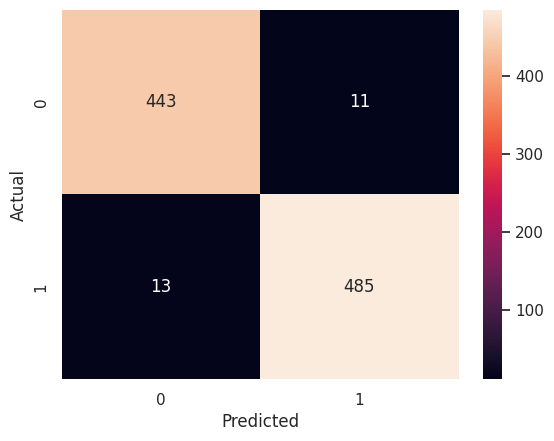

In [31]:
show_classification_matrix(y_train, y_train_pred)

## Naive Bayes Classifier

In [32]:
print('\033[1m***Training Naive Bayes Classification Model:***\033[1m')

# Define a parameter grid to search over
params = {
    "priors": [None],
    "var_smoothing": [1e-09]
}

# Create a RandomForestClassifier object with default hyperparameters
model_NB = GaussianNB()

# Create a StratifiedKFold object for cross-validation
cv_NB = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a RandomizedSearch object to search over the parameter grid
model_NB_random_search = RandomizedSearchCV(model_NB, param_distributions=params, scoring='f1', cv=cv_NB, n_jobs=-1, verbose=3)

# Fit the RandomizedSearchCV object to your training data
model_NB_random_search.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("\033[1mBest parameters found by RandomizedSearchCV for Naive Bayes Classifier:\033[1m", model_NB_random_search.best_params_)
# Print the best F1 score found by RandomizedSearchCV
print("\033[1mBest F1 score found by RandomizedSearchCV for Naive Bayes Classifier:\033[1m", model_NB_random_search.best_score_)

***Training Naive Bayes Classification Model:***
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found by RandomizedSearchCV for Naive Bayes Classifier: {'var_smoothing': 1e-09, 'priors': None}
Best F1 score found by RandomizedSearchCV for Naive Bayes Classifier: 0.8323249307477164


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.



In [33]:
# Use cross_validate to generate predictions on the training set
cv_results_NB = cross_validate(model_NB_random_search.best_estimator_, X_train, y_train, cv=5, scoring='f1', return_estimator=True, n_jobs=-1)

# Generate the classification report from the cross-validated results
y_train_pred = cv_results_NB['estimator'][cv_results_NB['test_score'].argmax()].predict(X_train)
print("Classification report generated from the results of NaiveBayesClassifier:")
print(classification_report(y_train, y_train_pred))

# Set the font scale of the seaborn plots
sns.set(font_scale=1)


Classification report generated from the results of NaiveBayesClassifier:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       454
           1       0.85      0.82      0.84       498

    accuracy                           0.83       952
   macro avg       0.83      0.83      0.83       952
weighted avg       0.83      0.83      0.83       952



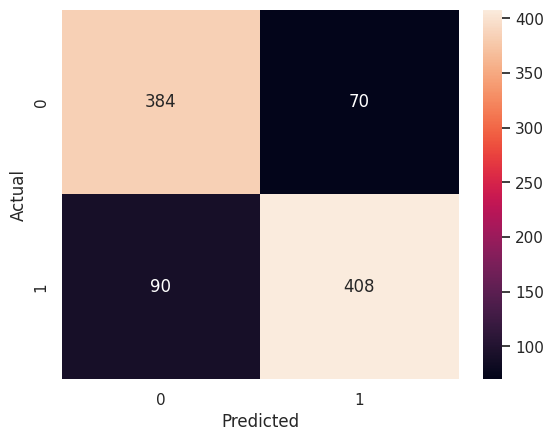

In [34]:
show_classification_matrix(y_train, y_train_pred)

# Finding the Best Model

In [35]:
data_scores = {
    'Classifier': ['Random Forest','Decision Tree','Naive Bayes'], 
    'f1_score': [model_RFC_random_search.best_score_, model_DT_random_search.best_score_, model_NB_random_search.best_score_]
    }
df_f1scores = pd.DataFrame(data_scores)
df_f1scores

,Classifier,f1_score
0,Random Forest,0.909156
1,Decision Tree,0.867061
2,Naive Bayes,0.832325


In [36]:
print("\033[1mThe best model is RandomForest Classifier and the score is\033[1m", df_f1scores['f1_score'].max())

The best model is RandomForest Classifier and the score is 0.9091560076801881


## Visualization of Best Score

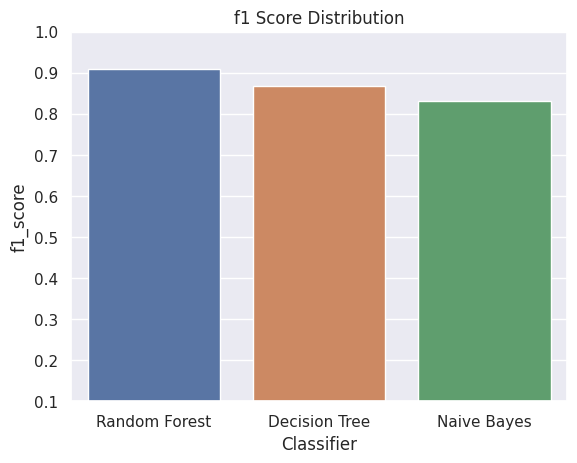

In [37]:
# Visualize the distribution of the target variable
sns.barplot(data=df_f1scores, x='Classifier', y='f1_score')
plt.gca().set_ylim(.1,1)
plt.title('f1 Score Distribution')
plt.show()

# Runing the Best Classifier Model on the Test Data

In [38]:
y_predicted_test = model_RFC_random_search.best_estimator_.predict(X_test)
print("\033[1mClassification report generated from the results of RandomForestClassifier:\033[1m")
print(classification_report(y_test, y_predicted_test))
sns.set(font_scale=1)

Classification report generated from the results of RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       107
           1       0.95      0.95      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238



In [39]:
# Evaluate the best classifier model on the test set
y_pred = model_RFC_random_search.predict(X_test)
test_f1_score = f1_score(y_test, y_pred)
print("\033[1mTest F1 score of the best model: {:.4f}\033[1m".format(test_f1_score))

Test F1 score of the best model: 0.9506


## Visualizing the F1 Score of the Best Model for both Train and Test Data

In [40]:
print("\033[1mTraining F1 score of the best model: {:.4f}\033[1m".format(model_RFC_random_search.best_score_))
print("\033[1mTest F1 score of the best model: {:.4f}\033[1m".format(test_f1_score))

Training F1 score of the best model: 0.9092
Test F1 score of the best model: 0.9506


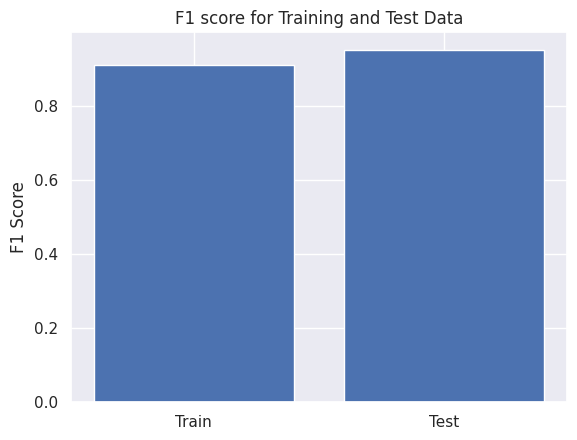

In [41]:
# Plot the F1 scores for the training and test data
fig, ax = plt.subplots()
ax.bar(['Train', 'Test'], [model_RFC_random_search.best_score_, test_f1_score])
ax.set_title('F1 score for Training and Test Data')
ax.set_ylabel('F1 Score')
plt.show()

# Finding the Most Important Features

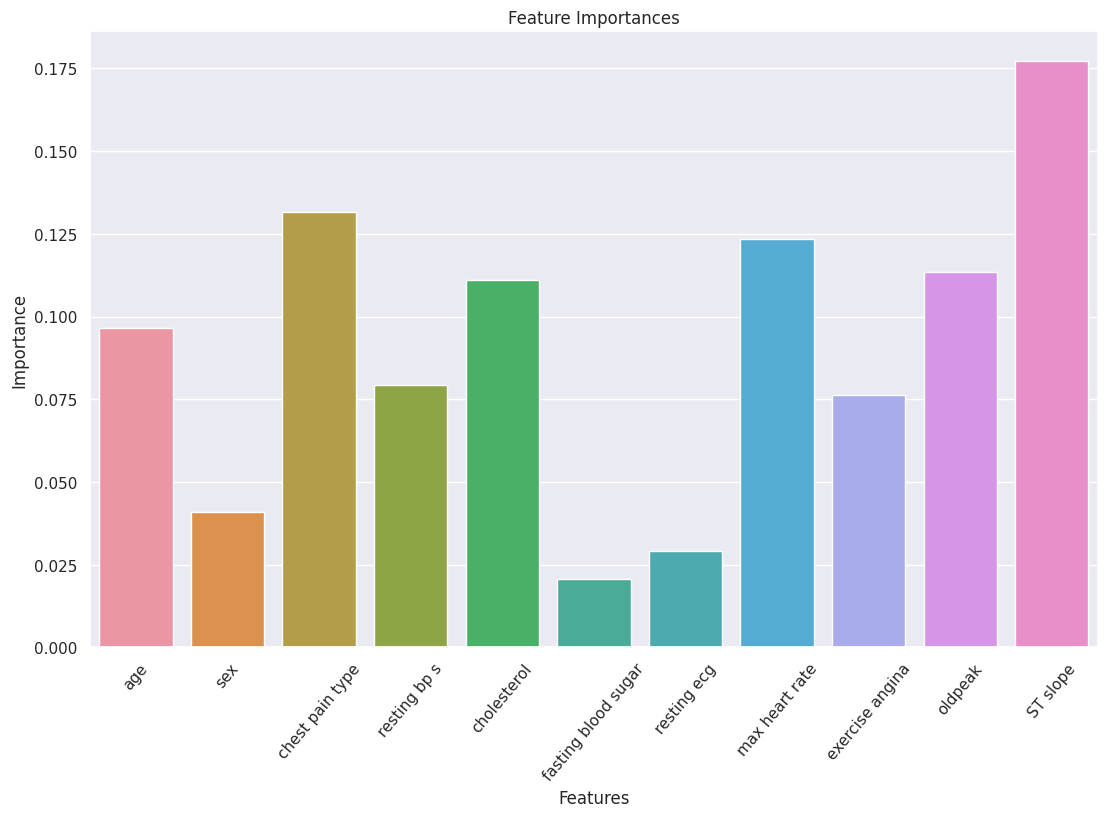

In [42]:
# Train the model and obtain feature importances
model_RFC.fit(X_train, y_train)
feature_importances = pd.DataFrame(model_RFC.feature_importances_, index=heart_df.columns[:-1], columns=['importance'])

# Create a larger canvas
fig, ax = plt.subplots(figsize=(13, 8))

# Create a bar plot of feature importances
sns.barplot(x=feature_importances.index, y=feature_importances['importance'], ax=ax)
ax.set_title('Feature Importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.tick_params(axis='x', rotation=50)

# Show the plot
plt.show()


# Predicting the target variable (Heart Disease) with the help of best model.

In [43]:
def heart_disease_prediction(age, sex, chest_pain_type, resting_bp_s, cholesterol, fasting_blood_sugar, resting_ecg, max_heart_rate, exercise_angina, oldpeak, ST_slope):
    # Convert inputs to numpy array
    x = np.array([[age, 1 if sex == "Male" else 0, chest_pain_type, resting_bp_s, cholesterol, fasting_blood_sugar, resting_ecg, max_heart_rate, exercise_angina, oldpeak, ST_slope]])
    # Return the predicted class using the trained model
    return "Heart Disease" if model_RFC_random_search.predict(x.reshape(1, -1))[0] == 1 else "No Heart Disease"

In [44]:
chance_of_unhealthy_heart = heart_disease_prediction(20,1,2,110,230,1,1,140,1,2.2,2)
print("Predicted Result:", chance_of_unhealthy_heart)

Predicted Result: Heart Disease


In [45]:
chance_of_healthy_heart = heart_disease_prediction(40,1,2,140,289,0,0,172,0,0.0,2)
print("Predicted Result:", chance_of_healthy_heart)

Predicted Result: No Heart Disease


# Building the UI that has the ability to predict the heart disease with the help of the best model which has the greater f1 score accuracy using "Streamlit".

#### For this part of code refer the .py file 